In [1]:
#😉 Add path for importing libraries
import sys
sys.path.append('/home/jetlee/workspace')
sys.path.append('/home/jetlee/workspace/dspy')
sys.path.append('/home/jetlee/workspace/ragas')

#😉 Load env. 
from dotenv import load_dotenv
load_dotenv('/home/jetlee/workspace/.env')

#😉 Set cache for LangChain
import os
from langchain.globals import set_llm_cache
from langchain_community.cache import SQLiteCache
if not os.path.exists("langchain_cache"): os.mkdir("langchain_cache")
set_llm_cache(SQLiteCache(database_path="langchain_cache/sqlite_cache.db"))

# #😉 Set cache for DSPy
# os.environ["DSP_CACHEBOOL"]='true'
# os.environ["DSP_NOTEBOOK_CACHEDIR"]='./dspy_cache'
# # os.environ["DSP_CACHEDIR"] = "{CACHE_DIR_FOR_PY_FILES_NOT_FOR_NOTEBOOKS}"

# #😉 Set DSPy
# import dspy
# dspy_settings = dict(lm = dspy.OpenAI(model='gpt-4o-mini'), rm = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts'))
# dspy.settings.configure(**dspy_settings)

#😉 For notebook
import nest_asyncio
nest_asyncio.apply()

#😉 LangSmith project
from langchain_core.tracers.context import tracing_v2_enabled



### 🚀 RAGAS Node
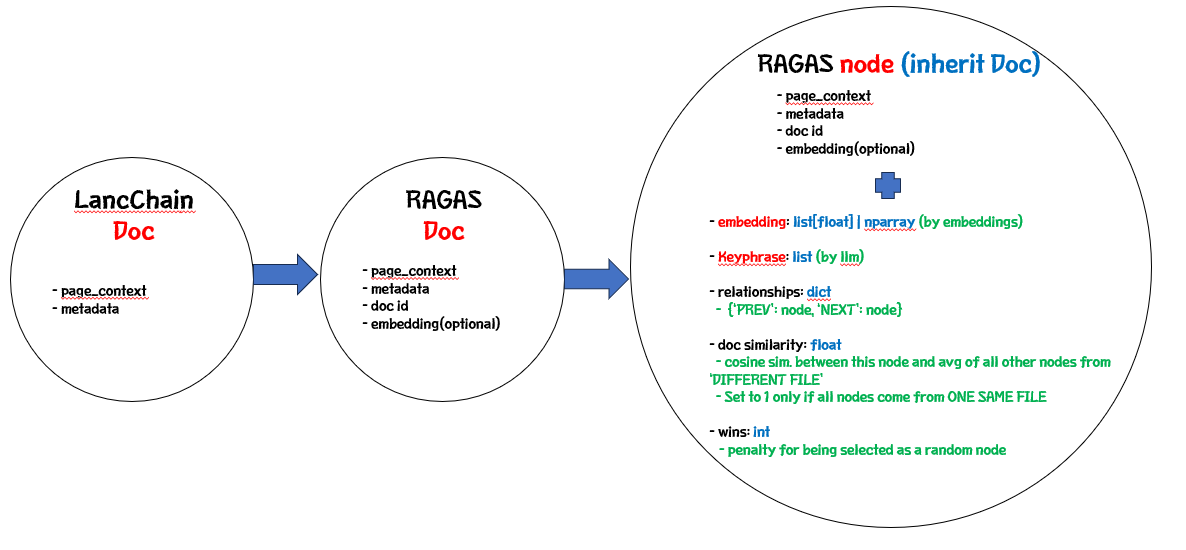

In [2]:
# 😉 Key Phrases extraction (When creating nodes)

from ragas.testset.prompts import (compress_question_prompt, conditional_question_prompt, find_relevant_context_prompt, multi_context_question_prompt, question_answer_prompt, question_rewrite_prompt, reasoning_question_prompt, seed_question_prompt, keyphrase_extraction_prompt)

from langchain_community.document_loaders import PyMuPDFLoader
documents = PyMuPDFLoader(file_path="https://s2.q4cdn.com/470004039/files/doc_earnings/2024/q3/filing/_10-Q-Q3-2024-As-Filed.pdf").load()

# print(f"[instruction]: {keyphrase_extraction_prompt.instruction}")
# print(f"[examples]: {keyphrase_extraction_prompt.examples}")
# print('[SAMPLE OUTPUT]: {"keyphrases": ["Securities and Exchange Commission", "Form 10-Q", "Apple Inc.", "Common Stock", "Nasdaq Stock Market"]}')

### 🚀 RAGAS SDG - SIMPLE EVOLUTION
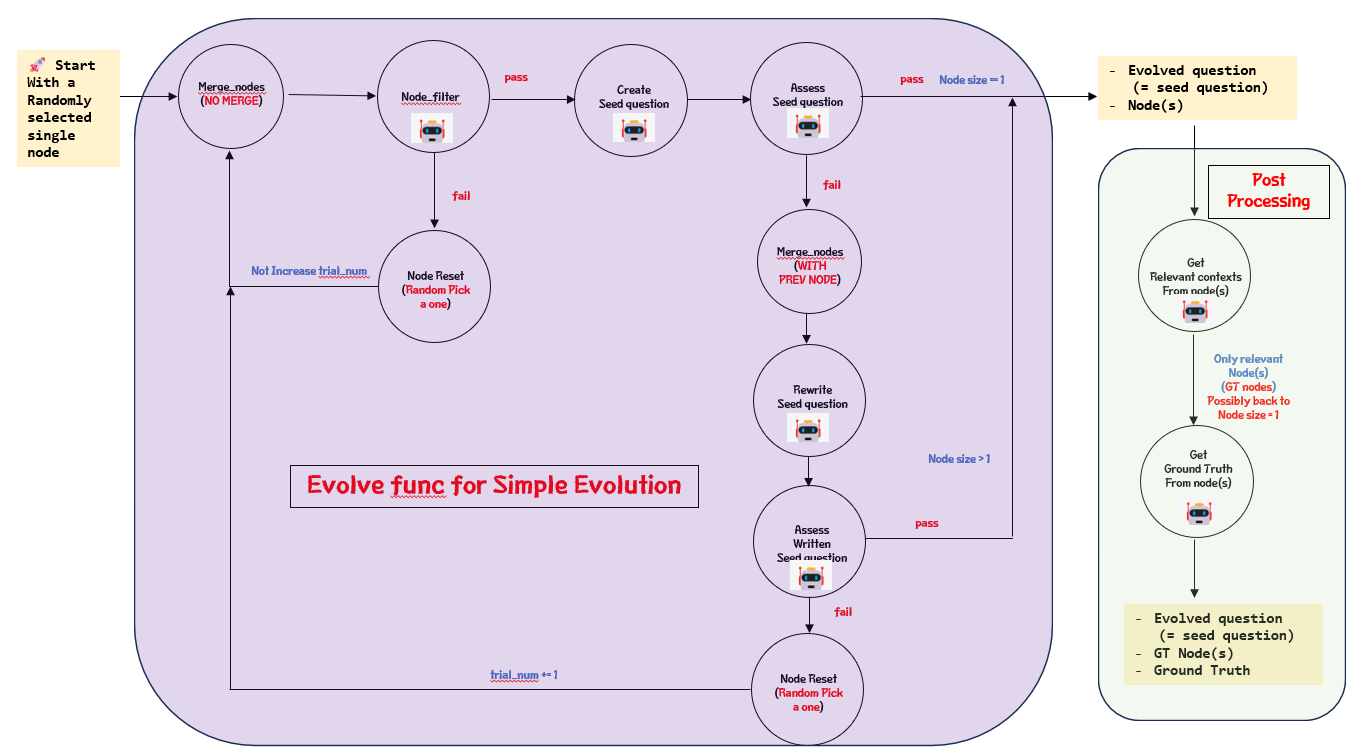



### 🚀 RAGAS SDG - Complex EVOLUTION
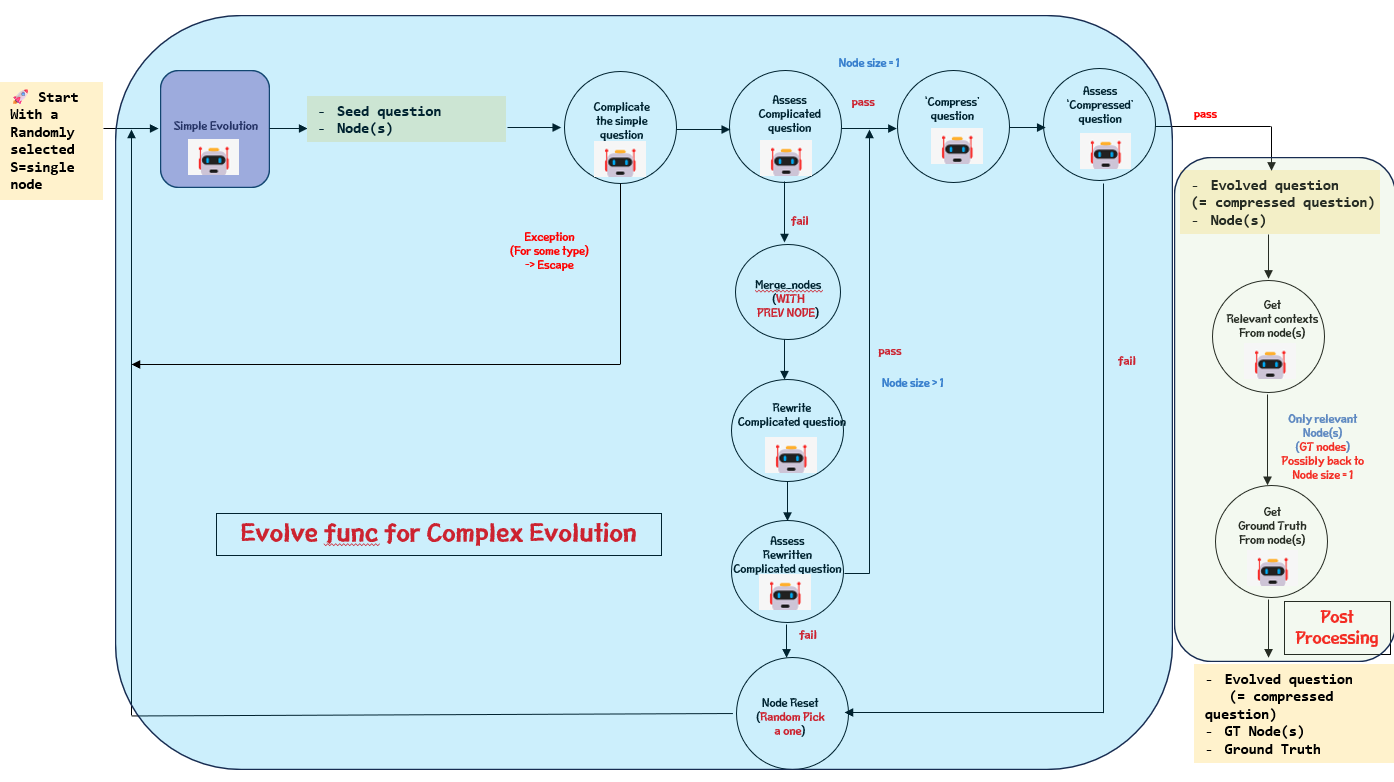

### 🚀 RAGAS generator class

In [3]:
from ragas.testset.generator import TestsetGenerator
from langchain_wrappers.langchain_chat_models import MyChatOpenAI
from langchain_wrappers.langchain_embedding_models import MyOpenAIEmbeddings

test_set_generator = TestsetGenerator.from_langchain(
    generator_llm = MyChatOpenAI.from_model(name='SDG_GENERATOR-KEYPHRASES'),       #😉 converted into RAGAS LLM -> Needed for 'ONLY' creating nodes
    critic_llm = MyChatOpenAI.from_model(name='SDG_CRITIC'),          #😉 converted into RAGAS LLM -> NO NEED SINCE WE PASS IN MANUALLY FOR EVOLUTIONS
    embeddings = MyOpenAIEmbeddings.from_model(),    #😉 converted into RAGAS EMBEDDING
    docstore = None  #😉 Commonly set None. If None, 'InMemoryDocumentStore (RAGAS DOCSTORE)' will be created. 'RAGAS DOCSTORE' is more like 'NODE STORE' 
)

'LANGSMITH_PROJECT' is set to 'default' by default.


In [4]:
# 😉 RAGAS wrappers
from ragas.llms import LangchainLLMWrapper
from ragas.testset.filters import EvolutionFilter, NodeFilter, QuestionFilter
from ragas.testset.evolutions import SimpleEvolution, ReasoningEvolution, MultiContextEvolution

def get_evolution_params(evolution_type: str):
    assert evolution_type in ['simple', 'reasoning', 'multi_context'], "Invalid evolution type: Must be one of ['simple', 'reasoning', 'multi_context']"

    generator_llm_name = f"{evolution_type}_EVOLUTION_GENERATOR"
    node_filter_name = f"{evolution_type}_EVOLUTION_NODE_FILTER" 
    question_filter_name = f"{evolution_type}_EVOLUTION_QUESTION_FILTER" 
    evolution_filter_name = f"{evolution_type}_EVOLUTION_EVOLUTION_FILTER" 

    generator_llm = LangchainLLMWrapper(MyChatOpenAI.from_model(name=generator_llm_name))
    node_filter = NodeFilter(LangchainLLMWrapper(MyChatOpenAI.from_model(name=node_filter_name)))
    question_filter = QuestionFilter(LangchainLLMWrapper(MyChatOpenAI.from_model(name=question_filter_name)))
    evolution_filter = EvolutionFilter(LangchainLLMWrapper(MyChatOpenAI.from_model(name=evolution_filter_name)))

    if evolution_type=="simple":
        return {'generator_llm':generator_llm, 'node_filter':node_filter, 'question_filter':question_filter}
    else:
        return {'generator_llm':generator_llm, 'node_filter':node_filter, 'question_filter':question_filter, 'evolution_filter':evolution_filter}

simple = SimpleEvolution(**get_evolution_params('simple'))
reasoning = ReasoningEvolution(**get_evolution_params('reasoning'))
multi_context = MultiContextEvolution(**get_evolution_params('multi_context'))


### 🚀Generate testset with 'generate_with_langchain_docs' API! Too simple!
- 🚀 Simple Evolution

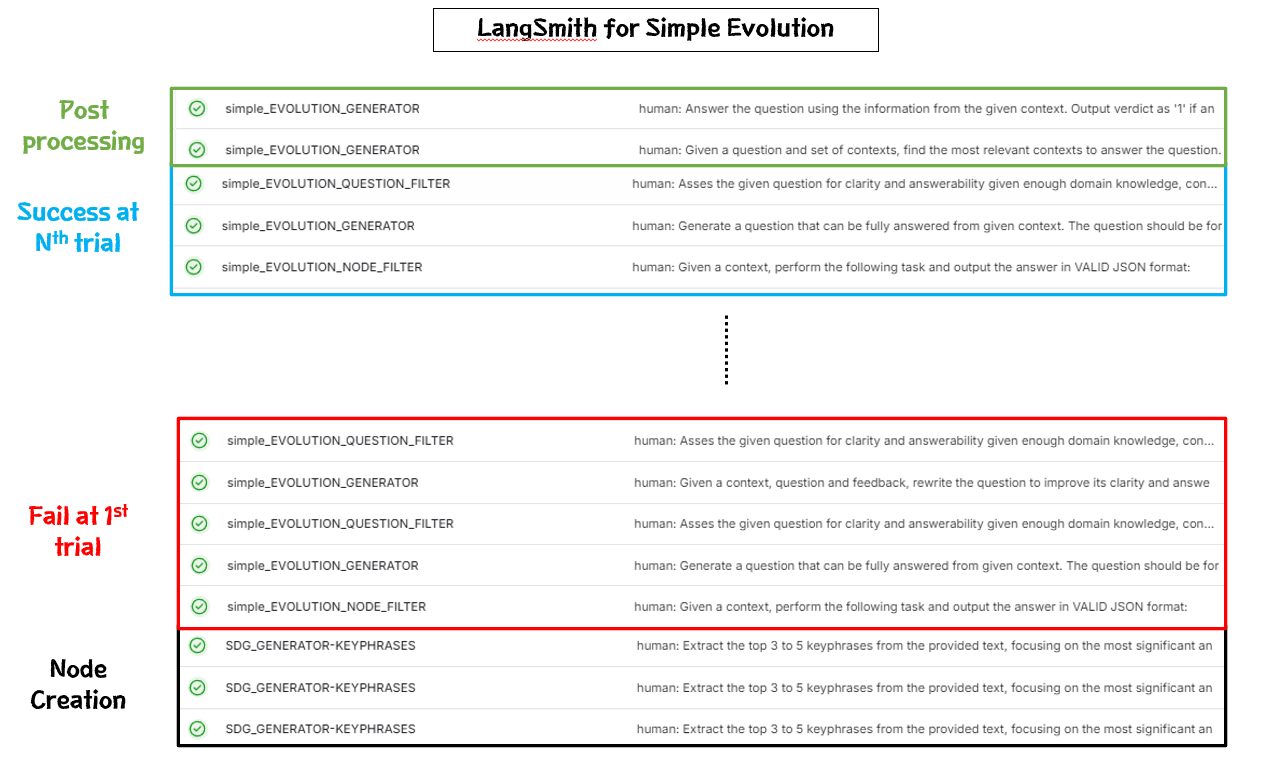

In [5]:
# os.environ['LANGSMITH_PROJECT'] = 'Simple_Evolution'
# with tracing_v2_enabled("NodeGeneration"):
#     test_set_generator.generate_with_langchain_docs(
#         documents = documents[:10],
#         test_size = None,
#         only_create_nodes = True
#     )
# sdg_simple = test_set_generator.generate_with_langchain_docs(
#     # documents = documents[:3],  #😉 list[LANGCHAIN DOCUMENT]  -> converted into RAGAS DOCUMENT
#     test_size = 1, # int
#     distributions = {simple: 1, reasoning: 0, multi_context: 0}, #😉 if None, set to {0.5, 0.25, 0.25}
#     is_async = False,
#     with_debugging_logs=False,
#     run_config=None, #😉 if None, set to default config RunConfig(timeout=180, max_retries=15, max_wait=90, max_workers=16, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False, seed=42)
#     )


### 🚀Generate testset with 'generate_with_langchain_docs' API! Too simple!
- 🚀 Reasoning (Multi-hop) Evolution

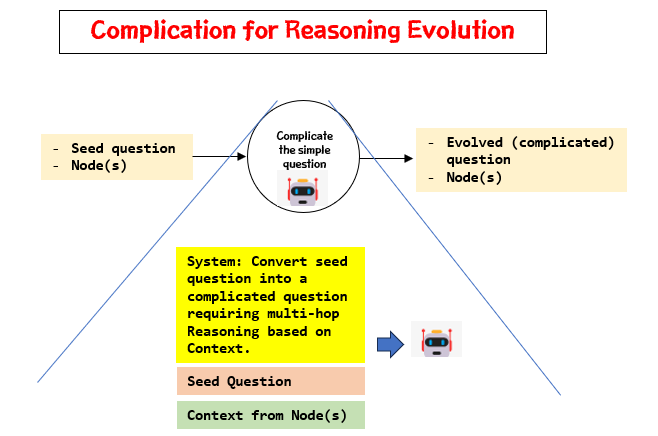 
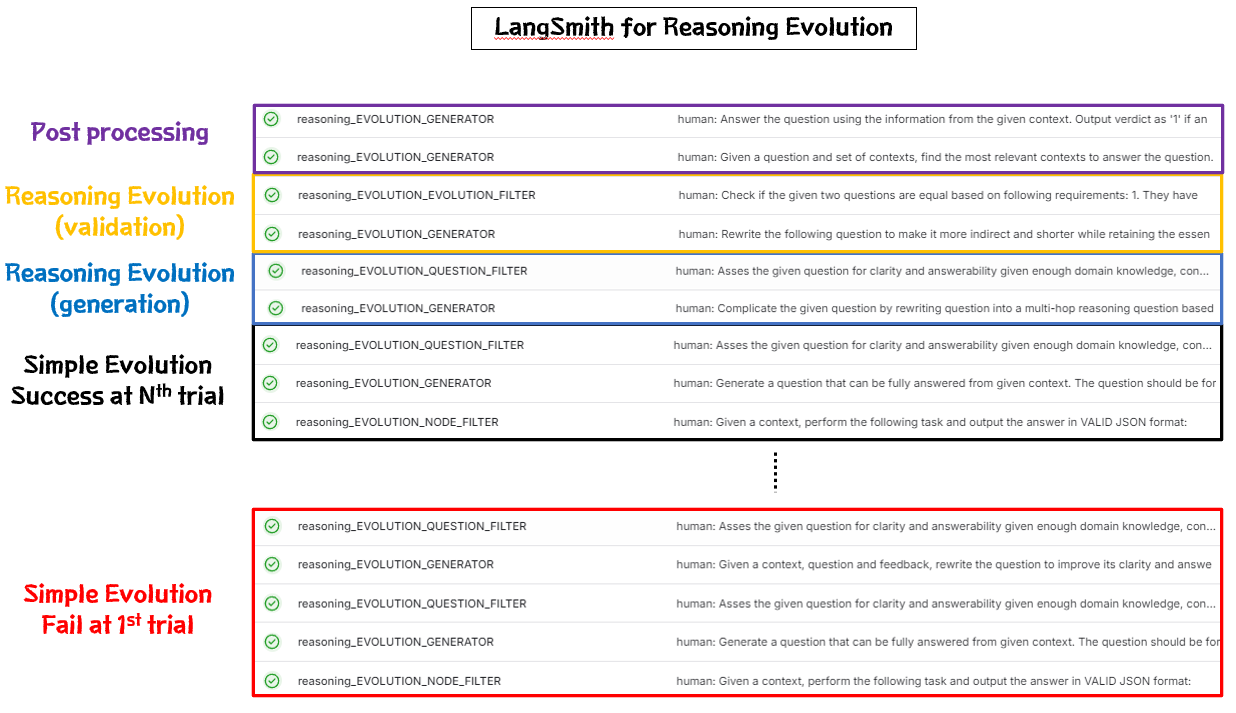

In [6]:
# os.environ['LANGSMITH_PROJECT'] = 'Reasoning_Evolution'
# with tracing_v2_enabled("NodeGeneration"):
#     test_set_generator.generate_with_langchain_docs(
#         documents = documents[:10],
#         test_size = None,
#         only_create_nodes = True
#     )

# sdg_reasoning = test_set_generator.generate_with_langchain_docs(
#     # documents = documents[:3],  #😉 list[LANGCHAIN DOCUMENT]  -> converted into RAGAS DOCUMENT
#     test_size = 1, # int
#     distributions = {simple: 0, reasoning: 1, multi_context: 0}, #😉 if None, set to {0.5, 0.25, 0.25}
#     is_async = False,
#     with_debugging_logs=False,
#     run_config=None, #😉 if None, set to default config RunConfig(timeout=180, max_retries=15, max_wait=90, max_workers=16, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False, seed=42)
#     )


### 🚀Generate testset with 'generate_with_langchain_docs' API! Too simple!
- 🚀 Multi-context Evolution 

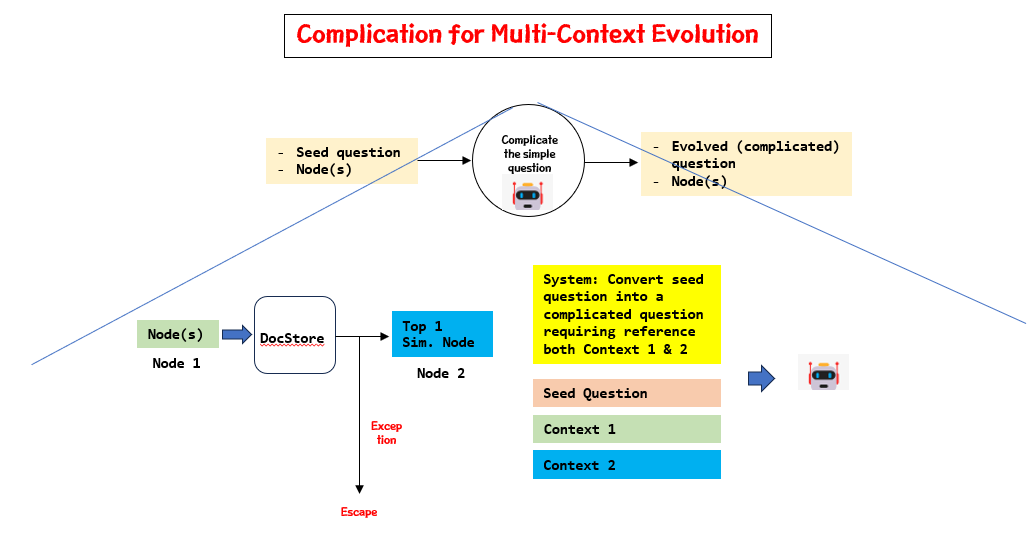
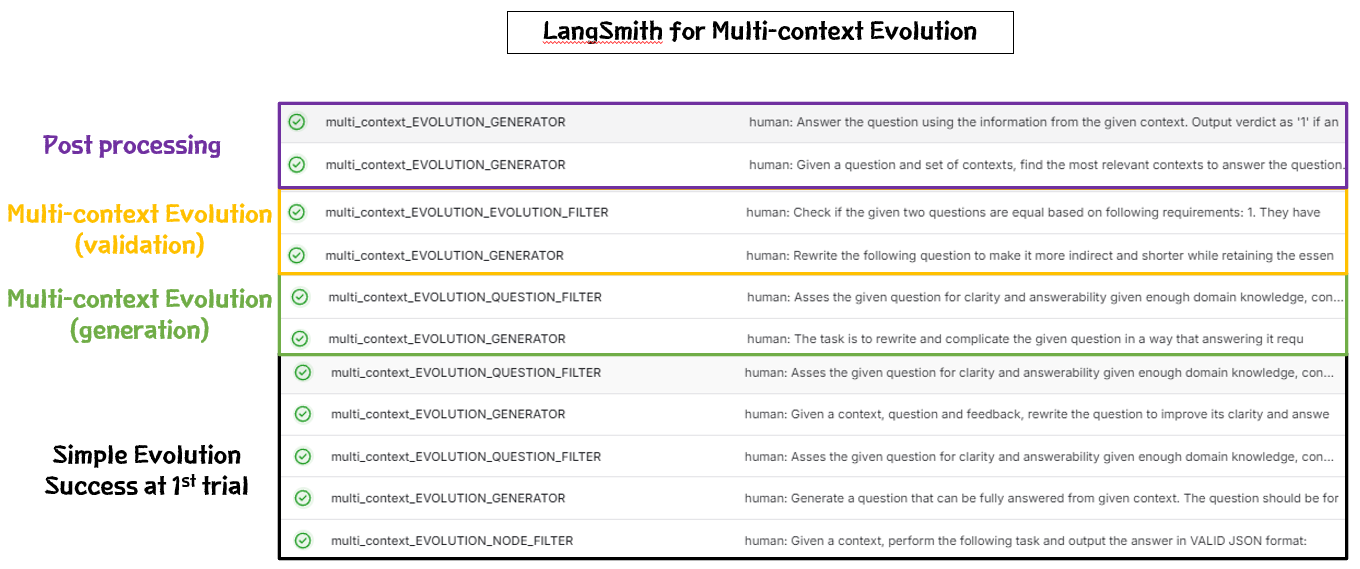

In [7]:
os.environ['LANGSMITH_PROJECT'] = 'Multi_Context_Evolution'
with tracing_v2_enabled("NodeGeneration"):
    test_set_generator.generate_with_langchain_docs(
        documents = documents[:20],
        test_size = None,
        only_create_nodes = True
    )


sdg_multi_context = test_set_generator.generate_with_langchain_docs(
    # documents = documents[:3],  #😉 list[LANGCHAIN DOCUMENT]  -> converted into RAGAS DOCUMENT
    test_size = 1, # int
    distributions = {simple: 0, reasoning: 0, multi_context: 1}, #😉 if None, set to {0.5, 0.25, 0.25}
    is_async = False,
    with_debugging_logs=False,
    run_config=None, #😉 if None, set to default config RunConfig(timeout=180, max_retries=15, max_wait=90, max_workers=16, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False, seed=42)
    )


🚀🚀 Node Creation Starts
👋 There are 23 chunks.


embedding nodes:   0%|          | 0/46 [00:00<?, ?it/s]

🥳 Get 23 nodes successfully.
🚢🚢 Node Creation Ends


Generating:   0%|          | 0/1 [00:00<?, ?it/s]

🚀🚀 Evolution Starts
Nodes info -> numbers: 1, root_node_page_content_len: 4507, wins: 1


              🚀🚀 Simple Evolution Starts
              (current_tries: 0)
               ------↓↓↓↓-------
               👋 Node Validation -> llm called
              - Nodes info (before merge): numbers: 1 root_node_page_conent_len: 4507, wins: 1
              - Nodes info (after merge):  numbers: 1 root_node_page_conent_len: 4507, wins: 1
               🥳 Nodes Validated

             ------↓↓↓↓-------
               👋 Seed Question Generated -> llm called

             ------↓↓↓↓-------
               👋 Seed Question Validation -> llm called
                😭 Seed Question Validation Fail

             ------↓↓↓↓-------
               👋 Seed Question Rewritten -> llm called

             ------↓↓↓↓-------
               👋 Validate Rewritten Seed Question
               🥳 Written Seed Question Validated

               🚢🚢 Simple Evolution Ends

Obtained Evolved Question and Node(s) for Revoluti

### 🚀 multi_context Evolution -> ? stpes
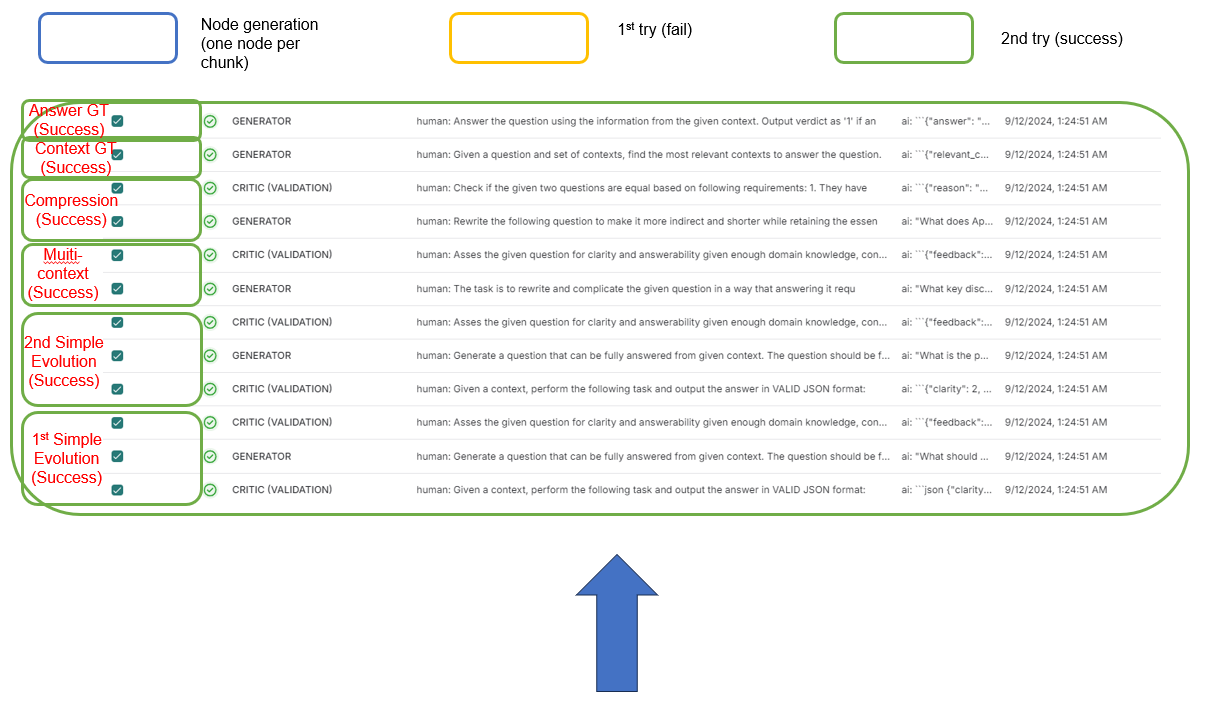
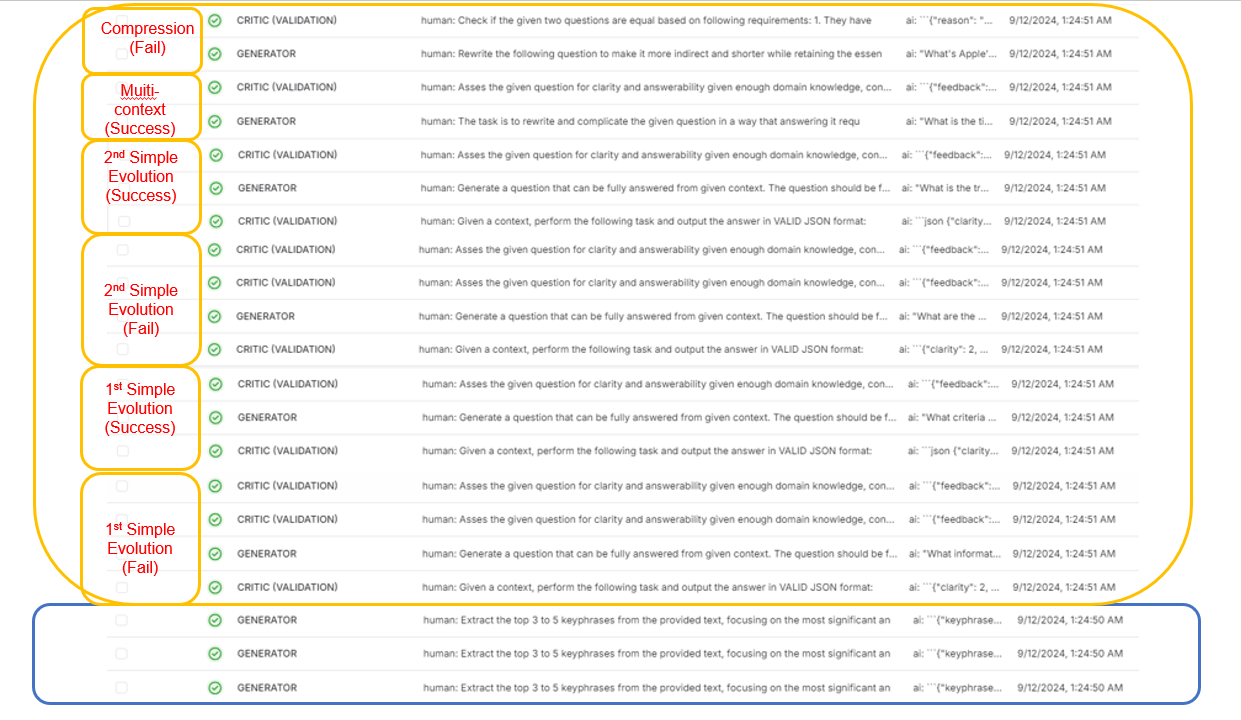

In [ ]:
# 😉 [Step 1] : context_scoring_prompt (??) -> critic
print(f"[instruction]: {context_scoring_prompt.instruction}")
print(f"[examples]: {context_scoring_prompt.examples}")
print('[SAMPLE OUTPUT]: {"clarity":3,"depth":2,"structure":3,"relevance":3}')
print("-"*50)


# 😉 [Step 2] : Generate seed question (??) -> generator
print(f"[instruction]: {seed_question_prompt.instruction}")
print(f"[examples]: {seed_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What is the trading symbol for Common Stock registered by Apple Inc.?"')
print("-"*50)

# 😉 [Step 3] : Assess seed question (??) -> critic -> Only given a question (NOT context)
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)



# 😉 [Step 4] : context_scoring_prompt (??) -> critic (Step 1 반복)
print(f"[instruction]: {context_scoring_prompt.instruction}")
print(f"[examples]: {context_scoring_prompt.examples}")
print('[SAMPLE OUTPUT]: {"clarity":3,"depth":2,"structure":3,"relevance":3}')
print("-"*50)


# 😉 [Step 5] : Generate seed question (??) -> generator  (Step 2 반복)
print(f"[instruction]: {seed_question_prompt.instruction}")
print(f"[examples]: {seed_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What is the trading symbol for Common Stock registered by Apple Inc.?"')
print("-"*50)

# 😉 [Step 6] : Assess seed question (??) -> critic -> Only given a question (NOT context)   (Step 4 반복)
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)





# 😉 [Step 7] : Complicate the seed question into multi context (??) -> generator -> Given a question and context 1 & context 2 (question은 둘 중 하나 랜덤? 두번쨰 거 선택하는 듯... 디폴트?)
print(f"[instruction]: {multi_context_question_prompt.instruction}")
print(f"[examples]: {multi_context_question_prompt.examples}")
print('[SAMPLE OUTPUT]: ). "What is the ticker symbol for the common equity of Apple Inc. as listed on the Nasdaq?')
print("-"*50)




# 😉 [Step 8] : Assess the complicated question (??) -> critic -> Only given a question (NOT context) [Step 3 반복]
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)



# 😉 [Step 9] : Compress the complicated question (??) -> generator -> Only given a question (NOT context) 
print(f"[instruction]: {compress_question_prompt.instruction}")
print(f"[examples]: {compress_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What classifications apply to a large accelerated filer?"')
print("-"*50)




# 😉 [Step 10] : Compress the complicated question (??) -> critic -> GIVEN TWO QUESTIONS (COMPLICATED QUESTION & COMPRESSED COMPLICATED QUESTION) -> 특이하게 VERDICT 0 (두 질문이 뎁스네서 다른 질문) 이어햐 패스
print(f"[instruction]: {evolution_elimination_prompt.instruction}")
print(f"[examples]: {evolution_elimination_prompt.examples}")
print('[SAMPLE OUTPUT]: {"reason": "The first question focuses on the specific criteria required for classification as a large accelerated filer, while the second question addresses the classifications themselves, which may include various types. This indicates a difference in depth and breadth of inquiry.", "verdict": 0}')
print("-"*50)




# 😉 [Step 11] : Extract GT contexts (??) -> generator -> Given a question and [contexts] -> 
print(f"[instruction]: {find_relevant_context_prompt.instruction}")
print(f"[examples]: {find_relevant_context_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"relevant_contexts": [1]}')  # -> 하나만 있어도 됨. -> 하나만 있으면 이 하나만 GT context로 사용됨. 뭔가 이상함. ... 두개 다 있어야 하지 않나?
print("-"*50)


# 😉 [Step 12] : Get GT answer (??) -> generator -> Given a question and [contexts]
# 😉 Negative example 가능 (context로 부터 답을 유추할 수 없다면 그렇다고 대답하는 것도 GT임!!)
print(f"[instruction]: {question_answer_prompt.instruction}")
print(f"[examples]: {question_answer_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"answer": "The trading symbol for Common Stock registered by Apple Inc. is AAPL.", "verdict": 1}')
print("-"*50)

### 🚀 Reasoning Evolution -> ? stpes

In [ ]:
# 😉 [Step 1] : context_scoring_prompt (??) -> critic
print(f"[instruction]: {context_scoring_prompt.instruction}")
print(f"[examples]: {context_scoring_prompt.examples}")
print('[SAMPLE OUTPUT]: {"clarity":3,"depth":2,"structure":3,"relevance":3}')
print("-"*50)


# 😉 [Step 2] : Generate seed question (??) -> generator
print(f"[instruction]: {seed_question_prompt.instruction}")
print(f"[examples]: {seed_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What is the trading symbol for Common Stock registered by Apple Inc.?"')
print("-"*50)

# 😉 [Step 3] : Assess seed question (??) -> critic -> Only given a question (NOT context)
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)

# 😉 [Step 4] : Complicate the seed question into multi-hop (??) -> generator -> Given a question and [contexts]
print(f"[instruction]: {reasoning_question_prompt.instruction}")
print(f"[examples]: {reasoning_question_prompt.examples}")
print('[SAMPLE OUTPUT]: ). "What classifications can a Registrant fall under if it meets large accelerated filer criteria?"')
print("-"*50)


# 😉 [Step 5] : Assess the complicated question (??) -> critic -> Only given a question (NOT context) [Step 3 반복]
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)


# 😉 [Step 6] : Compress the complicated question (??) -> generator -> Only given a question (NOT context) 
print(f"[instruction]: {compress_question_prompt.instruction}")
print(f"[examples]: {compress_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What classifications apply to a large accelerated filer?"')
print("-"*50)


# 😉 [Step 7] : Compress the complicated question (??) -> critic -> GIVEN TWO QUESTIONS (COMPLICATED QUESTION & COMPRESSED COMPLICATED QUESTION) -> 특이하게 VERDICT 0 (두 질문이 뎁스네서 다른 질문) 이어햐 패스
print(f"[instruction]: {evolution_elimination_prompt.instruction}")
print(f"[examples]: {evolution_elimination_prompt.examples}")
print('[SAMPLE OUTPUT]: {"reason": "The first question focuses on the specific criteria required for classification as a large accelerated filer, while the second question addresses the classifications themselves, which may include various types. This indicates a difference in depth and breadth of inquiry.", "verdict": 0}')
print("-"*50)


# 😉 [Step 8] : Extract GT contexts (??) -> generator -> Given a question and [contexts]
print(f"[instruction]: {find_relevant_context_prompt.instruction}")
print(f"[examples]: {find_relevant_context_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"relevant_contexts": [1]}')
print("-"*50)


# 😉 [Step 9] : Get GT answer (??) -> generator -> Given a question and [contexts]
# 😉 Negative example 가능 (context로 부터 답을 유추할 수 없다면 그렇다고 대답하는 것도 GT임!!)
print(f"[instruction]: {question_answer_prompt.instruction}")
print(f"[examples]: {question_answer_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"answer": "The trading symbol for Common Stock registered by Apple Inc. is AAPL.", "verdict": 1}')
print("-"*50)

### 🚀 Simple Evolution -> 5 stpes
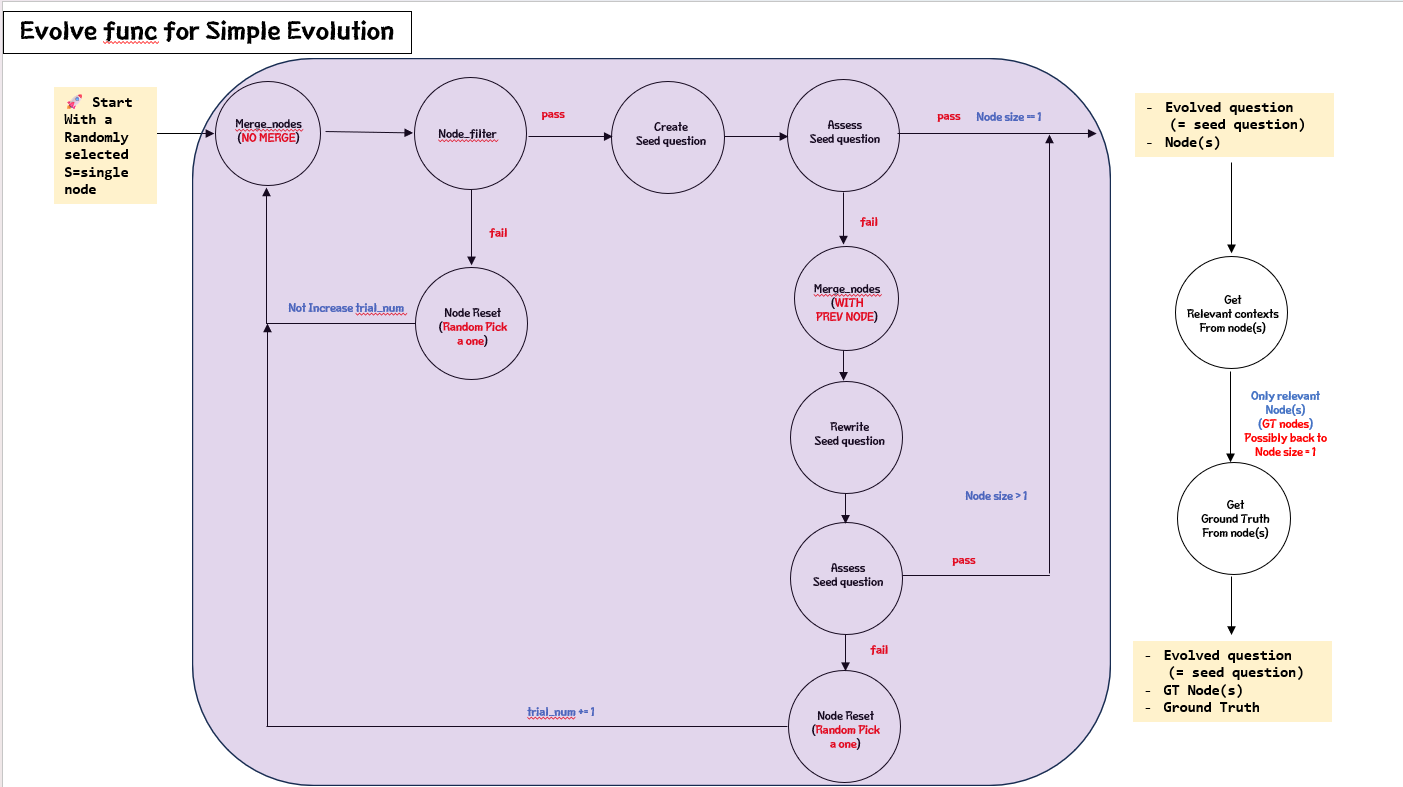
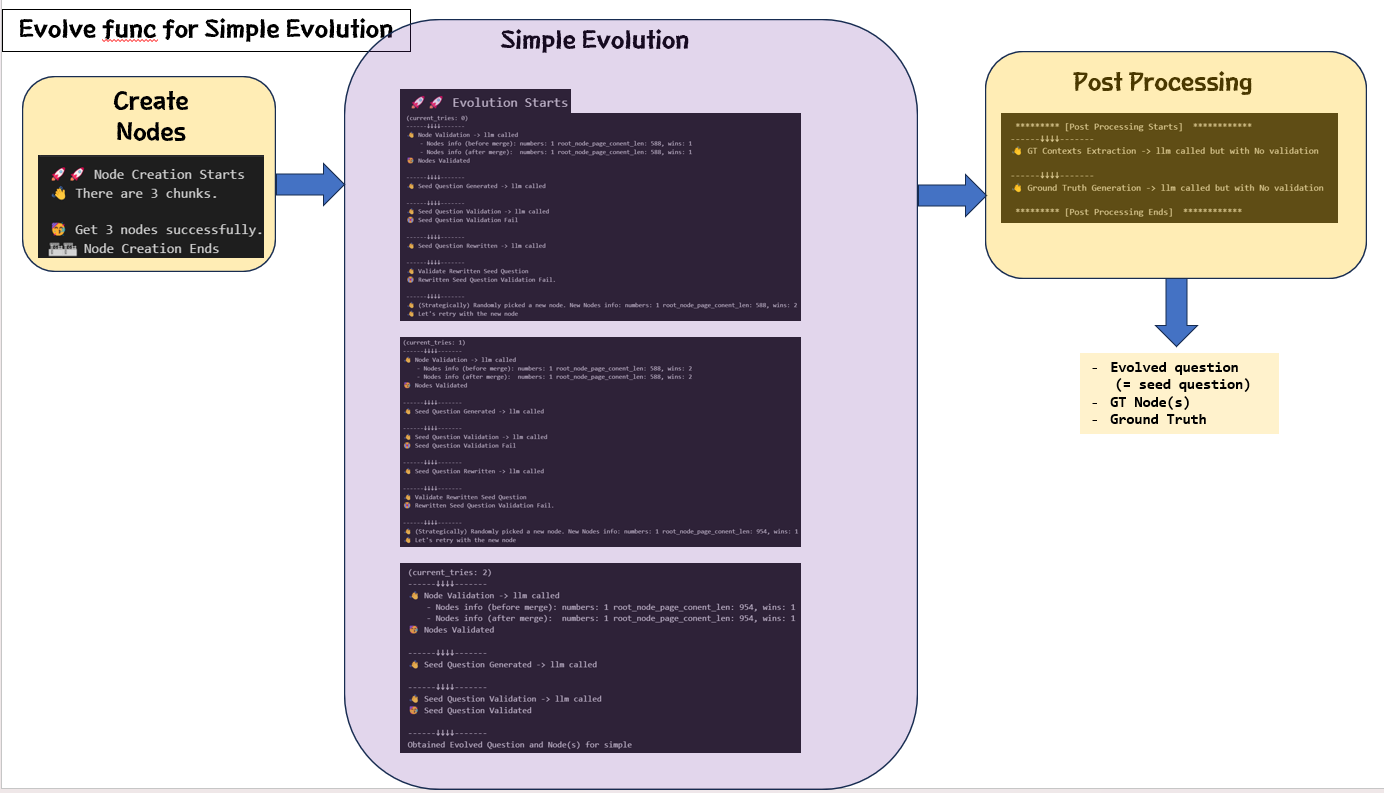

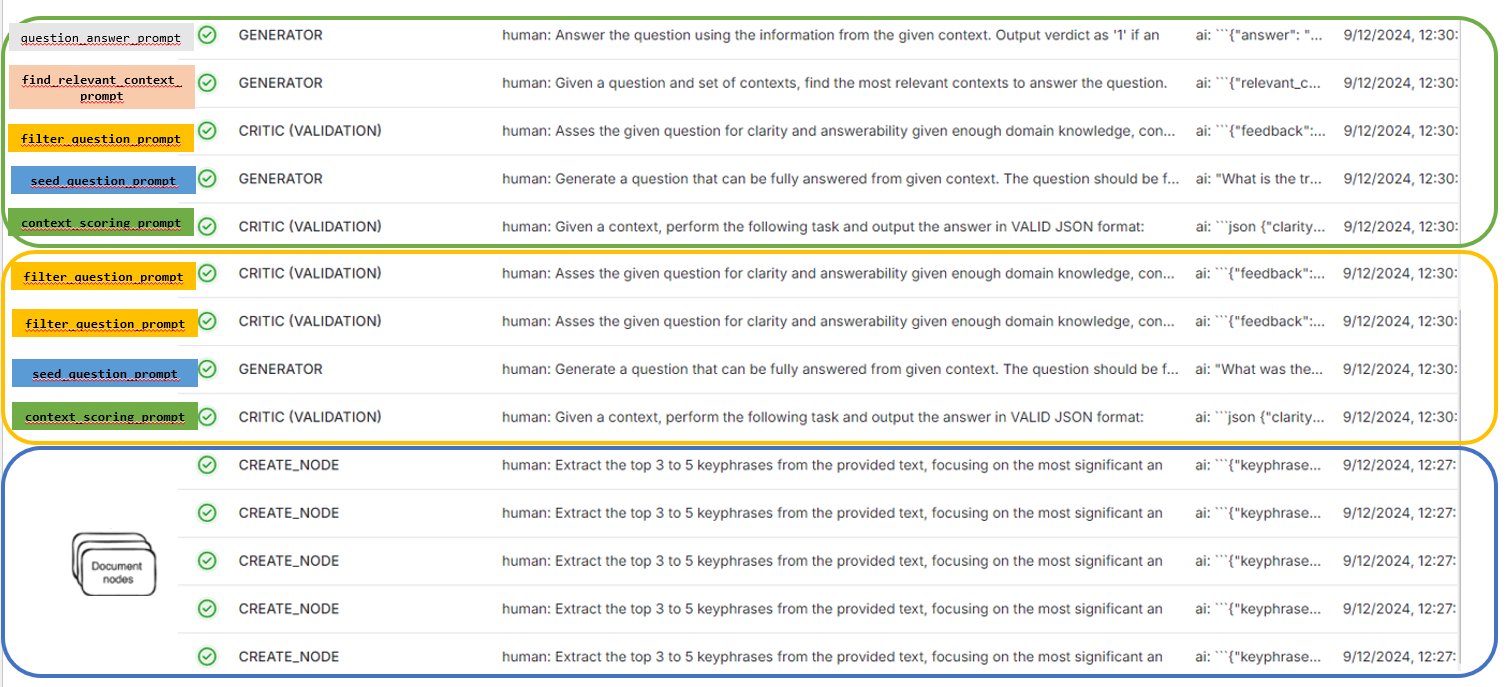

In [ ]:
# 😉 [Step 1] : context_scoring_prompt (??) -> critic
print(f"[instruction]: {context_scoring_prompt.instruction}")
print(f"[examples]: {context_scoring_prompt.examples}")
print('[SAMPLE OUTPUT]: {"clarity":3,"depth":2,"structure":3,"relevance":3}')
print("-"*50)


# 😉 [Step 2] : Generate seed question (??) -> generator
print(f"[instruction]: {seed_question_prompt.instruction}")
print(f"[examples]: {seed_question_prompt.examples}")
print('[SAMPLE OUTPUT]: "What is the trading symbol for Common Stock registered by Apple Inc.?"')
print("-"*50)

# 😉 [Step 3] : Assess seed question (??) -> critic -> Only given a question (NOT context)
print(f"[instruction]: {filter_question_prompt.instruction}")
print(f"[examples]: {filter_question_prompt.examples}")
print('[SAMPLE OUTPUT]: {"feedback": "The question is clear and specific, asking for the trading symbol of a particular stock (Common Stock registered by Apple Inc.). It does not rely on external references or additional context, making it self-contained. The intent is straightforward, seeking a specific piece of information. Therefore, it meets the criteria for clarity and answerability.", "verdict": 1}')
print("-"*50)

# 😉 [Step 4] : Extract GT contexts (??) -> generator -> Given a question and [contexts]
print(f"[instruction]: {find_relevant_context_prompt.instruction}")
print(f"[examples]: {find_relevant_context_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"relevant_contexts": [1]}')
print("-"*50)


# 😉 [Step 5] : Get GT answer (??) -> generator -> Given a question and [contexts]
# 😉 Negative example 가능 (context로 부터 답을 유추할 수 없다면 그렇다고 대답하는 것도 GT임!!)
print(f"[instruction]: {question_answer_prompt.instruction}")
print(f"[examples]: {question_answer_prompt.examples}")
print('[SAMPLE OUTPUT]: ). {"answer": "The trading symbol for Common Stock registered by Apple Inc. is AAPL.", "verdict": 1}')
print("-"*50)